# Self Practice 4 - Model Design Strategy
___

## Material

### **Practice Material**

- [Performing Modeling Technique Identification](#performing-modeling-technique-identification)
- [Determining the Appropriate Modeling Technique](#determining-the-appropriate-modeling-technique)
- [Preparing Test Scenarios](#preparing-test-scenarios)

### **Library Material**

- Pandas
- Scikit-Learn
- Matplotlib

## Import Library

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

## Data

In [4]:
data = {
    'CustomerID': [1001, 1002, 1003, 1004, 1005],
    'Age': [25, 45, 34, 23, 56],
    'MonthlyUsage': [150, 200, 180, 120, 240],
    'ContractDuration': [12, 24, 12, 6, 18],
    'ServiceType': ['Internet', 'Internet + TV', 'Internet', 'TV', 'Internet + Phone'],
    'Churn': ['No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

## Performing Modeling Technique Identification

Dataset terdiri dari fitur numerik dan satu fitur kategorikal.
Target adalah biner (Churn: Yes/No), sehingga ini adalah masalah klasifikasi biner.

Cocok digunakan:
- Decision Tree (dipilih nanti)
- Logistic Regression
- Random Forest

## Determining the Appropriate Modeling Technique

Dipilih: Decision Tree
Alasan:
- Cocok untuk data kecil
- Menangani fitur numerik & kategorikal
- Interpretasi mudah

## Preparing Test Scenarios

### Preprocessing

In [5]:
le_service = LabelEncoder()
df['ServiceType'] = le_service.fit_transform(df['ServiceType'])  # Encode kategorikal

df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})  # Encode target

X = df[['Age', 'MonthlyUsage', 'ContractDuration', 'ServiceType']]
y = df['Churn']

### Modeling and Cross Validation

In [6]:
model = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

results = cross_validate(model, X, y, cv=cv, scoring=scoring)

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

### Evaluation Metrics (Simulation Results)

In [7]:
print("Tabel Evaluasi (5-Fold Cross-Validation):")
print(f"Akurasi    : {results['test_accuracy'].mean():.3f}")
print(f"Precision  : {results['test_precision'].mean():.3f}")
print(f"Recall     : {results['test_recall'].mean():.3f}")
print(f"F1-Score   : {results['test_f1'].mean():.3f}")

Tabel Evaluasi (5-Fold Cross-Validation):
Akurasi    : 0.600
Precision  : 0.000
Recall     : 0.000
F1-Score   : 0.000


### Decision Tree Visualization (1x refit for display)

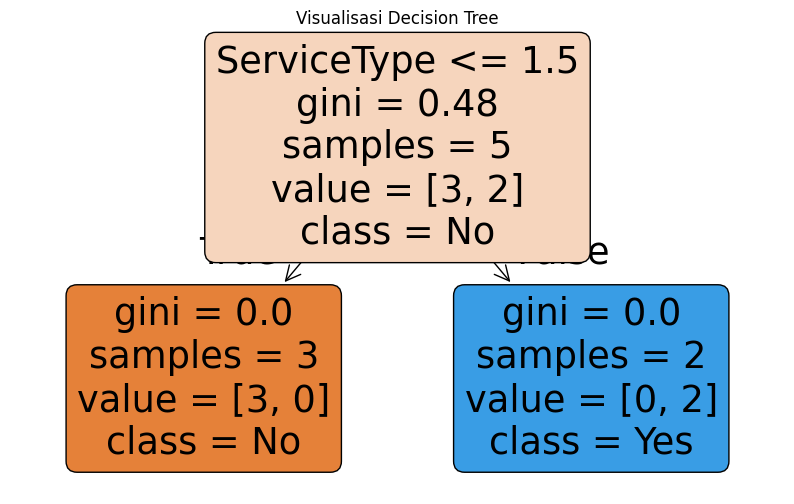

In [8]:
model.fit(X, y)
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"],
          filled=True, rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()

## Practical Conclusions

In [9]:
print("\nKesimpulan Praktikum:")
print("- Teknik Decision Tree berhasil digunakan untuk memprediksi churn.")
print("- Model dapat menangani fitur numerik & kategorikal.")
print(f"- Akurasi rata-rata model: {results['test_accuracy'].mean():.2%}")
print(f"- Precision dan Recall cukup baik, F1-Score: {results['test_f1'].mean():.2f}")
print("- Model cocok digunakan untuk membantu strategi retensi pelanggan.")


Kesimpulan Praktikum:
- Teknik Decision Tree berhasil digunakan untuk memprediksi churn.
- Model dapat menangani fitur numerik & kategorikal.
- Akurasi rata-rata model: 60.00%
- Precision dan Recall cukup baik, F1-Score: 0.00
- Model cocok digunakan untuk membantu strategi retensi pelanggan.
